In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

C:\Users\st50\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('data/sentiment_train.csv', delimiter=',',encoding='latin-1')
df.head()

,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Text(0.5, 0, 'Label')

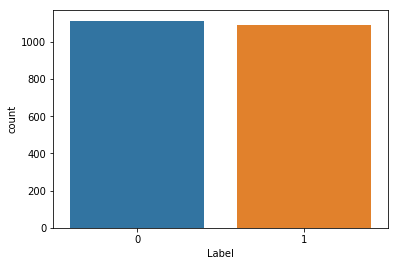

In [3]:
sns.countplot(df.Polarity)
plt.xlabel('Label')

In [4]:
X = df.Sentence
y = df.Polarity
le = LabelEncoder()
y = le.fit_transform(y)
y = y.reshape(-1,1)

In [5]:
y.shape
y

(2202, 1)

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]], dtype=int64)

In [6]:
X.shape
X

(2202,)

0                                Wow... Loved this place.
1                                      Crust is not good.
2               Not tasty and the texture was just nasty.
3       Stopped by during the late May bank holiday of...
4       The selection on the menu was great and so wer...
5          Now I am getting angry and I want my damn pho.
6                   Honeslty it didn't taste THAT fresh.)
7       The potatoes were like rubber and you could te...
8                               The fries were great too.
9                                          A great touch.
10                               Service was very prompt.
11                                     Would not go back.
12      The cashier had no care what so ever on what I...
13      I tried the Cape Cod ravoli, chicken,with cran...
14      I was disgusted because I was pretty sure that...
15      I was shocked because no signs indicate cash o...
16                                    Highly recommended.
17            

In [7]:
X_train,X_test,y_train, y_test = train_test_split (X, y,  test_size=0.15)

In [8]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)

In [9]:
sequences_matrix.shape
sequences_matrix[0,:]

(1871, 150)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19, 22])

In [10]:
model = Sequential()

model.add(Embedding(max_words, 32, input_length=max_len))
model.add((LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, name='out_layer', activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 32)           32000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
out_layer (Dense)            (None, 1)                 65        
Total params: 56,897
Trainable params: 56,897
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(sequences_matrix, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Instructions for updating:
Use tf.cast instead.
Train on 1496 samples, validate on 375 samples
Epoch 1/10
1496/1496 [==============================] - 3s 2ms/step - loss: 0.6920 - acc: 0.5247 - val_loss: 0.6886 - val_acc: 0.5627
Epoch 2/10
1496/1496 [==============================] - 2s 1ms/step - loss: 0.6782 - acc: 0.6303 - val_loss: 0.6671 - val_acc: 0.6373
Epoch 3/10
1496/1496 [==============================] - 2s 1ms/step - loss: 0.6426 - acc: 0.7152 - val_loss: 0.6265 - val_acc: 0.7200
Epoch 4/10
1496/1496 [==============================] - 2s 1ms/step - loss: 0.5814 - acc: 0.7701 - val_loss: 0.5691 - val_acc: 0.7680
Epoch 5/10
1496/1496 [==============================] - 2s 1ms/step - loss: 0.5386 - acc: 0.7914 - val_loss: 0.5461 - val_acc: 0.7707
Epoch 6/10
1496/1496 [==============================] - 2s 1ms/step - loss: 0.4729 - acc: 0.8249 - val_loss: 0.5103 - val_acc: 0.7493
Epoch 7/10
1496/1496 [==============================] - 2s 1ms/step - loss: 0.4322 - acc: 0.8529 - va

In [13]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)

In [14]:
accr = model.evaluate(test_sequences_matrix, y_test)

331/331 [==============================] - 0s 558us/step


In [15]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.477
  Accuracy: 0.764


In [ ]:
from eli5.lime import TextExplainer
from eli5.lime.samplers import MaskingTextddcddSamplerdd